## 16.4 Statistical Measures Don’t Tell the Whole Story

There are an enormous number of different statistics that can be extracted from a data set.

By carefully choosing among these, it is possible to convey <b>a variety of different impressions about the same data</b>. 

In 1973, the statistician F.J. Anscombe published a paper containing the table
below. It contains the <x, y> coordinates of the points in each of four data sets.


|x0 |y0|x1|y2|x2|y2|x3|y3|
| ---- |:------:| :------:| :------:|  :------:| :------:| :------:|  ----:|
|10.0|	8.04 |	10.0|	9.14 |	10.0 	|7.46	|8.0    |6.58|
|8.0| 	6.95 |	8.0 |	8.14 |	8.0     |6.77	|8.0    |5.76|
|13.0| 	7.68 |	13.0|	8.74 |	13.0    |12.74	|8.0    |7.71|
|9.0|	8.81 |	9.0 |	8.77 |	9.0     |7.11	|8.0    |8.84|
|11.0| 	8.33 |	11.0|	9.26|	11.0    |7.81	|8.0    |8.47|
|14.0| 	9.96 |	14.0|	8.10 |	14.0    |8.84	|8.0    |7.04|
|6.0|	7.24 |	6.0 |	6.13 |	6.0     |6.08	|8.0 	|5.25|
|4.0| 	4.26 |	4.0 |	3.10| 	4.0     |5.39	|19.0 	|12.5|
|12.0|	10.84| 	12.0| 	9.13| 	12.0    |8.15	|8.0 	|5.56|
|7.0| 	4.82 | 	7.0 |	7.26| 	7.0     |6.42	|8.0 	|7.91|
|5.0| 	5.68 | 	5.0 | 	4.74| 	5.0     |5.73	|8.0 	|6.89|


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from  statistics import mean,stdev,pstdev,variance,pvariance

from prettytable import PrettyTable  

filenames=[]   #  filename
xygroup=[]     #  {'x':[],'y':[]}

xstagroup=[]   #  {'avg':None,'stdev':None,'pstdev':None,'var':None,'pvar':None}
ystagroup=[]   #  {'avg':None,'stdev':None,'pstdev':None,'var':None,'pvar':None}
rgroup=[]      #  

lfit=[]        # {'a':None,'b':None,'preY':[]}

def getData_TextFile(fileName):
    dataFile = open(fileName, 'r')
    
    xy={'x':[],'y':[]}
    
    discardHeader = dataFile.readline()
    for line in dataFile:
        x,y= line.split()
        xy['x'].append(float(x))
        xy['y'].append(float(y))
    dataFile.close()
    return xy
    
def satData(x,y):
    xsta={'avg':None,'stdev':None,'pstdev':None,'var':None,'pvar':None}
    ysta={'avg':None,'stdev':None,'pstdev':None,'var':None,'pvar':None}
    
    xsta['avg']=mean(x)
    ysta['avg']=mean(y)

    xsta['stdev']=stdev(x)
    ysta['stdev']=stdev(y)
    
    xsta['pstdev']=pstdev(x)
    ysta['pstdev']=pstdev(y)

    xsta['var']=variance(x)
    ysta['var']=variance(y)
    
    xsta['pvar']=pvariance(x)
    ysta['pvar']=pvariance(y)

    r=np.corrcoef(x,y)[0, 1]
  
    return  xsta,ysta,r

def fitData(x,y):    
    #find linear fit
    a,b = np.polyfit(x,y,1)
    predictedY = a*np.array(x) + b
    return a,b,predictedY

def plotData(x,y,a,b, predictedY,fileName):
    plt.plot(x,y, 'bo',
               label= fileName)
    plt.title(fileName)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.plot(x,predictedY,
               label = 'Y by\nlinear fit, y = '
               + str(round(a, 5))+'*x+'+str(round(b, 5)))
   
    plt.legend(loc = 'best')


def processing_one_TextFile(filename):
    
    xy=getData_TextFile(filename)
    
    xsta,ysta,r=satData(xy['x'],xy['y'])
    
    a,b,predictedY=fitData(xy['x'],xy['y'])   
    
    return xy,xsta,ysta,r,a,b,predictedY  

def processing_data_TextFiles(filenames):
    
    for i in range(len(filenames)):
        
        xy,xsta,ysta,r,a,b,predictedY =processing_one_TextFile(filenames[i])
        
        xygroup.append(xy)
      
        xstagroup.append(xsta)
        ystagroup.append(ysta)
        
        rgroup.append(r)
        
        lfit.append({'a':a,'b':b,'preY':predictedY})
      
             
def processing_plot_TextFiles(filenames):
    
    fig=plt.figure(figsize=(12.0,8.0))
    
    fig.subplots_adjust(left=0.05,right=0.95,bottom=0.05,top=0.95)
    
    figcount=len(filenames)
    
    figcol=2
    figrow=math.ceil(figcount/figcol)
    
    for i in range(figcount):
        fig.add_subplot(figrow, figcol,i+1)
        plotData(xygroup[i]['x'],xygroup[i]['y'],
                 lfit[i]['a'],lfit[i]['b'],lfit[i]['preY'],filenames[i])
       
    plt.show()            


def processing_table_TextFiles(filenames):
    
    table = PrettyTable(["data set",
                         "x-avg", "x-std", "x-pstd", "x-var","x-pvar",
                         "y-avg", "y-std", "y-pstd", "y-var","y-pvar",
                         "pearson_r"])  
    table.align= "r" # right align  
    table.padding_width = 1 # One space between column edges and contents (default)  
    
    for i in range(len(filenames)):
        table.add_row([filenames[i],
                   "%.3f" % xstagroup[i]['avg'],
                   "%.3f" % xstagroup[i]['stdev'],"%.3f" %xstagroup[i]['pstdev'],
                   "%.3f" % xstagroup[i]['var'],"%.3f" % xstagroup[i]['pvar'],
                   "%.3f" % ystagroup[i]['avg'],
                   "%.3f" % ystagroup[i]['stdev'],"%.3f" % ystagroup[i]['pstdev'],
                   "%.3f" % ystagroup[i]['var'],"%.3f" % ystagroup[i]['pvar'],
                   "%.3f" % rgroup[i]])  
    print(table)  



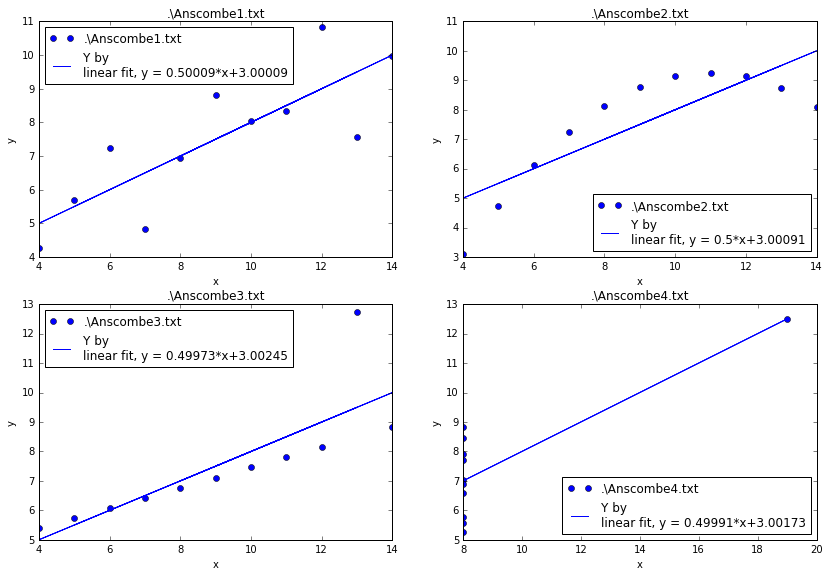

+-----------------+-------+-------+--------+--------+--------+-------+-------+--------+-------+--------+-----------+
|        data set | x-avg | x-std | x-pstd |  x-var | x-pvar | y-avg | y-std | y-pstd | y-var | y-pvar | pearson_r |
+-----------------+-------+-------+--------+--------+--------+-------+-------+--------+-------+--------+-----------+
| .\Anscombe1.txt | 9.000 | 3.317 |  3.162 | 11.000 | 10.000 | 7.501 | 2.032 |  1.937 | 4.127 |  3.752 |     0.816 |
| .\Anscombe2.txt | 9.000 | 3.317 |  3.162 | 11.000 | 10.000 | 7.501 | 2.032 |  1.937 | 4.128 |  3.752 |     0.816 |
| .\Anscombe3.txt | 9.000 | 3.317 |  3.162 | 11.000 | 10.000 | 7.500 | 2.030 |  1.936 | 4.123 |  3.748 |     0.816 |
| .\Anscombe4.txt | 9.000 | 3.317 |  3.162 | 11.000 | 10.000 | 7.501 | 2.031 |  1.936 | 4.123 |  3.748 |     0.817 |
+-----------------+-------+-------+--------+--------+--------+-------+-------+--------+-------+--------+-----------+


In [3]:
import glob

filenames=glob.glob(r'./Anscombe*.txt')

processing_data_TextFiles(filenames)
processing_plot_TextFiles(filenames)
processing_table_TextFiles(filenames)

These four data sets are statistically similar. They have 

1. the same mean value for x (9.0), the same mean value for y (7.5), 

2. the same population variance for x (10.0), the same population variance for y (3.75),

3. the same correlation between x and y (0.816).

Furthermore, 

if we use linear regression to fit a line to each, we get the same result for each, 

$y = 0.5x + 3$

But this do not mean that there is no obvious way to distinguish these data sets from each other?

As you see, one simply needs to plot the data to see that the data sets are not at all alike.

#### Statistical Measures Don’t Tell the Whole Story

The moral is simple: 
    
if possible, always take a look at some representation of the raw data.